# Predicting Heart Disease

In [ ]:
Heart Disease

**1. Import Dependencies and read data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn import datasets

In [2]:
train = pd.read_csv("https://s3.amazonaws.com/drivendata/data/54/public/train_values.csv")

In [3]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
target = pd.read_csv("https://s3.amazonaws.com/drivendata/data/54/public/train_labels.csv")

In [5]:
target.head() 

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [6]:
train["heart_disease_present"] = target["heart_disease_present"]

In [7]:
test = pd.read_csv("https://s3.amazonaws.com/drivendata/data/54/public/test_values.csv")

In [8]:
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [9]:
sample_submit= pd.read_csv("https://s3.amazonaws.com/drivendata/data/54/public/submission_format.csv")

In [10]:
sample_submit.head()

,patient_id,heart_disease_present
0,olalu7,0.5
1,z9n6mx,0.5
2,5k4413,0.5
3,mrg7q5,0.5
4,uki4do,0.5


In [11]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


**2. Visualizations**

**2.a HeatMap**

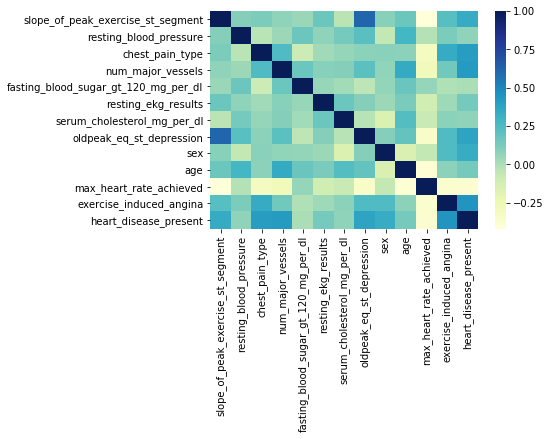

In [12]:
sns.heatmap(train.corr(),cmap='YlGnBu')

**2.b Boxplots**

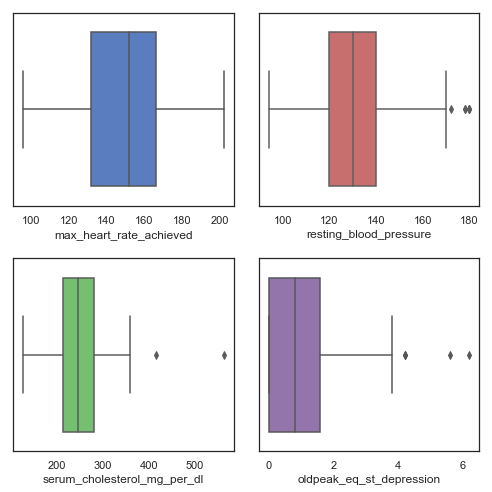

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7))
#sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.boxplot(train["max_heart_rate_achieved"], color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.boxplot(train["resting_blood_pressure"], color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.boxplot(train["serum_cholesterol_mg_per_dl"], color="g", ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.boxplot(train["oldpeak_eq_st_depression"], color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

**3 Data Cleaning**

**3.a Outliers Removal **

In [14]:
columns = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression']
for c in columns:
  Upperbound, Lowerbound = np.percentile(train[c],[1,99])
  train[c] = np.clip(train[c], Upperbound, Lowerbound)
  test[c] = np.clip(test[c], Upperbound, Lowerbound)

**3.b Mean Encodings**

In [15]:
cat_columns = ['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels',
               'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results', 
               'sex','exercise_induced_angina']

for c in cat_columns:
  train[c+'_mean_target'] = train[c].map(train.groupby(train[c]).heart_disease_present.mean())
  test[c+'_mean_target'] = test[c].map(train.groupby(train[c]).heart_disease_present.mean())

In [16]:
X = train.drop(columns=['patient_id', 'heart_disease_present','slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels',
               'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results', 
               'sex','exercise_induced_angina'])
y = train["heart_disease_present"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=44)

In [17]:
X_train.shape, X_val.shape

((144, 13), (36, 13))

In [18]:
y_train.shape, y_val.shape

((144,), (36,))

**4. Ensembling**

**4.a Random Forest Classifier**

In [39]:
model_RFC = RandomForestClassifier(n_estimators=30, min_samples_leaf=1, max_features=0.5)

In [40]:
model_RFC.fit(X_train, y_train)
predictions = model.predict(X_train)
predictions_val = model.predict(X_val)

sum(y_train==predictions)/len(X_train), sum(y_val==predictions_val)/len(X_val) 
accuracy = float(np.sum(predictions_val==y_val))/ y_val.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.777778


In [41]:
predictions_val

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

**5. Boosting**

#### 5.a AdaBoost

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
model_ABC = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [47]:
model_ABC.fit(X_train, y_train)
predictions = model_ABC.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.6944444444444444


In [48]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

**5.b Extreme gradient boosting**

In [58]:
model_xg_cl=xgb.XGBClassifier(objective = 'binary:logistic', n_estimator=333, seed=1004)

In [59]:
model_xg_cl.fit(X_train, y_train)
predictions=xg_cl.predict(X_val)
accuracy = float(np.sum(predictions==y_val))/ y_val.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.805556


In [51]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

**5.c BrownBoost**

In [ ]:
model_brownboost=brown.Boost(objective = )

**5.d LogitBoost**

**Submission**

In [36]:
predictions_test = modelp.predict_proba(test.drop(columns = ['patient_id','slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels',
               'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results', 
               'sex','exercise_induced_angina']))

In [37]:
def submission(predictions_test, sample_submit):
  sample_submit['heart_disease_present'] = predictions_test[:,1]
  sample_submit.to_csv("sample3.csv")
  return sample_submit

In [38]:
submission(predictions_test, sample_submit)

,patient_id,heart_disease_present
0,olalu7,0.513973
1,z9n6mx,0.466482
2,5k4413,0.586702
3,mrg7q5,0.487556
4,uki4do,0.594515
5,kev1sk,0.460203
6,9n6let,0.547842
7,jxmtyg,0.473270
8,51s2ff,0.487180
9,wi9mcs,0.490137
